In [1]:
import numpy as np

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate

diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

alpha_list = [0.0, 0.1, 0.2, 0.5, 1.0]
score_list = []

for alpha in alpha_list:
    model = linear_model.Lasso(alpha=alpha)
    cv_results = cross_validate(model, X, y, cv=5)
    score = cv_results['test_score'].mean()
    score_list.append(score)

opt_idx = np.argmax(score_list)
print('best model parameter: alpha={}'.format(alpha_list[opt_idx]))

best model parameter: alpha=0.1


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 165795.1500610953, tolerance: 72.83865916666667
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/

In [2]:
from sklearn.cluster import KMeans
import numpy as np
from pandas_datareader import data

df_px = data.get_data_yahoo(('XLF', 'XLB', 'XLK', 'XLY', 'XLV', 'XLI', 'XLE', 'XLU', 'XLY', 'XLRE'), start='2010-03-01', end='2021-02-28').loc[:, 'Adj Close']
df_rets = df_px.pct_change(1).dropna()

n = 3
kmeans = KMeans(n_clusters=n, random_state=0).fit(df_rets)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [3]:
centers

array([[-0.02763036, -0.02439367, -0.02423531, -0.02178245, -0.0189137 ,
        -0.02501986, -0.03177234, -0.01392381, -0.01941636],
       [ 0.00029944,  0.00020237,  0.00097235,  0.0006018 ,  0.00049777,
         0.00033959, -0.00052994,  0.00045014,  0.00056537],
       [ 0.02117754,  0.01928077,  0.01816653,  0.01607954,  0.01353007,
         0.01899654,  0.02513307,  0.00986133,  0.01259828]])

In [4]:
from pandas_datareader import data
from sklearn.cluster import KMeans

asset_tickers = ['SPY', 'TLT', 'AGG', 'EMB', 'ACWI', 'IWM', 'HYG', 'EFA', 'EEM', 'GOVT']
df_price = data.get_data_yahoo(asset_tickers, start='2012-03-01', end='2021-02-28')['Adj Close']
df_ret = np.log(df_price/df_price.shift(1)).dropna()

# cluster by ticker: stock vs bond
kmeans1 = KMeans(n_clusters=2, random_state=0).fit(df_ret.T)
print(kmeans1.labels_)  # [1, 0, 0, 0, 1, 1, 0, 1, 1, 0]

# cluster by date: positive vs negative returns
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(df_ret)
print(kmeans2.labels_)  # [1, 1, 1, ..., 0, 1, 1]

[0 1 1 1 0 0 1 0 0 1]
[0 0 0 ... 1 0 0]


In [5]:
from sklearn.neighbors import KNeighborsClassifier

df_price_train = data.get_data_yahoo('SPY', start='2012-03-01', end='2021-02-28')['Adj Close']
df_ret_train = np.log(df_price_train/df_price_train.shift(1)).dropna()
X_train = df_ret_train.values.reshape(-1, 1)[:-1]
y_train = np.where(df_ret_train>0, 1, 0)[1:]

df_price_test = data.get_data_yahoo('SPY', start='2021-03-01', end='2021-08-31')['Adj Close']
df_ret_test = np.log(df_price_test/df_price_test.shift(1)).dropna()
X_test = df_ret_test.values.reshape(-1, 1)[:-1]
y_test = np.where(df_ret_test>0, 1, 0)[1:]

knn = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
knn.predict(X_test)
knn.predict_proba(X_test)

array([[0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.

In [6]:
import matplotlib.pyplot as plt

knn.predict(X_test).mean()

0.49606299212598426

In [7]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train, y_train)
model.support_vectors_
model.predict(X_train).mean()

0.9800973020787263

In [8]:
import numpy as np
from pandas_datareader import data
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# prepare data
df_price_train = data.get_data_yahoo('SPY', start='2012-03-01', end='2021-02-28')['Adj Close']
df_ret_train = np.log(df_price_train/df_price_train.shift(1)).dropna()
X_train = df_ret_train.values.reshape(-1, 1)[:-1]
y_train = np.where(df_ret_train>0, 1, 0)[1:]

df_price_test = data.get_data_yahoo('SPY', start='2021-03-01', end='2021-03-31')['Adj Close']
df_ret_test = np.log(df_price_test/df_price_test.shift(1)).dropna()
X_test = df_ret_test.values.reshape(-1, 1)[:-1]
y_test = np.where(df_ret_test>0, 1, 0)[1:]

# train the model
model = svm.SVC(C=50, kernel='rbf', probability=True)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_train_probs = model.predict_proba(X_train)

# test the model
y_pred_test = model.predict(X_test)
y_pred_test_probs = model.predict_proba(X_train)

# model performance on train set
print(accuracy_score(y_train, y_pred_train))  # accuracy
print(confusion_matrix(y_train, y_pred_train))  # confusion matrix
#print(classification_report(y_train, y_pred_train, digits=4))  # full classification report

# model performance on test set
print(accuracy_score(y_test, y_pred_test))  # accuracy
print(confusion_matrix(y_test, y_pred_test))  # confusion matrix
#print(classification_report(y_test, y_pred_test, digits=4))  # full classification report

0.562140645731977
[[  23  981]
 [   9 1248]]
0.5238095238095238
[[ 0 10]
 [ 0 11]]


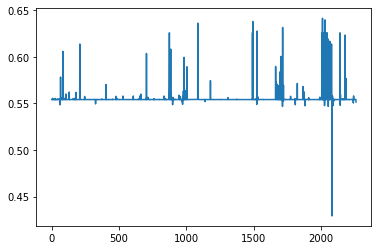

In [9]:
import matplotlib.pyplot as plt

plt.plot(y_pred_train_probs[:,1])

In [10]:
# sklearn: logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
score = model.coef_[0]

# sklearn: decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
score = model.feature_importances_

In [34]:
# SHAP: XGBoost
import shap  # remember to install shap first
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
explainer = shap.Explainer(model)
score = explainer(X_train)

# Grad-CAM: neural network
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import backend as K
model = VGG16(weights='imagenet', input_shape=(224, 224, 3))
preds = model.predict(preprocess_input(x))  # x is an image in the format of numpy array
label_ind = np.argmax(preds[0])

output = model.output[:, label_ind]
last_conv_layer = model.get_layer('block5_conv3')
grads = K.gradients(output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)

heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

ImportError: Numba needs NumPy 1.20 or less

In [33]:
score

array([1.])

In [43]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

param_grid= {'kernel': ('linear','sigmoid', 'rbf'), 'C': [0.01, 0.05, 0.1, 0.25, 1, 2.5, 5, 10, 25, 100], 'gamma': (1e-9, 5e-9, 1e-8, 5e-8, 1e-7, 1e-6)}

model = svm.SVC()
model.fit(X_train, y_train)

n_samples = X_train.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
valsScores = cross_val_score(model, X_train, y_train, cv=cv)

search = GridSearchCV(model, param_grid, cv=5)
param_fits = search.fit(X_train, y_train)

In [44]:
ord = np.argmax(param_fits.cv_results_['mean_test_score'])
print(param_fits.cv_results_['params'][ord])

{'C': 0.01, 'gamma': 1e-09, 'kernel': 'linear'}


In [7]:
param_fits.cv_results_

{'mean_fit_time': array([0.06949964, 0.13950262, 0.13581085, 0.07834501, 0.11295319,
        0.12038188, 0.07024488, 0.12874837, 0.12699709, 0.07140517,
        0.10005441, 0.11358581, 0.07722716, 0.12825179, 0.14497476,
        0.07147436, 0.10076165, 0.11237116, 0.07187414, 0.11398134,
        0.17088394, 0.07904935, 0.09797416, 0.13070683, 0.08177686,
        0.10915823, 0.20057921, 0.09126811, 0.13168674, 0.11860161,
        0.0735302 , 0.10452981, 0.18147664, 0.07186208, 0.09860826,
        0.20150704, 0.07500944, 0.09405937, 0.2944006 , 0.08191586,
        0.1453392 , 0.20569544, 0.23967004, 0.11158633, 0.51601768,
        0.09479475, 0.12296834, 0.14468913, 0.08268824, 0.09633245,
        0.6121593 , 0.08409266, 0.11344538, 0.14419231, 0.10662837,
        0.14305949, 1.59249072, 0.08218436, 0.11174908, 0.14908338]),
 'std_fit_time': array([0.005557  , 0.01320873, 0.03018996, 0.00242829, 0.0097679 ,
        0.0085409 , 0.00227227, 0.0090617 , 0.00895981, 0.00597682,
        0.005

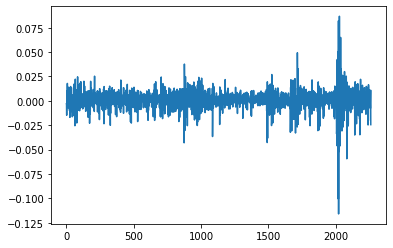

In [20]:
import matplotlib.pyplot as plt
plt.plot(X_train)

In [31]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [35]:
model.coef_

array([[-1.16592993e-08]])

In [51]:
import optunity
import optunity.metrics
import sklearn.svm

# score function: twice iterated 10-fold cross-validated accuracy
@optunity.cross_validated(x=X_train, y=y_train, num_folds=10, num_iter=2)
def svm_auc(x_train, y_train, x_test, y_test, logC, logGamma):
    model = sklearn.svm.SVC(C=10 ** logC, gamma=10 ** logGamma).fit(x_train, y_train)
    decision_values = model.decision_function(x_test)
    return optunity.metrics.roc_auc(y_test, decision_values)

# perform tuning
hps, _, _ = optunity.maximize(svm_auc, num_evals=200, logC=[-5, 2], logGamma=[-5, 1])

In [52]:
hps

{'logC': 1.6967953792114276, 'logGamma': -1.4774605042184448}

In [55]:
import math

print(math.exp(hps['logC']))
print(math.exp(hps['logGamma']))

5.456433543729151
0.22821650797707496


In [65]:
df_ret_train

Date
2012-03-02   -0.003054
2012-03-05   -0.004086
2012-03-06   -0.014733
2012-03-07    0.006952
2012-03-08    0.009900
                ...   
2021-02-22   -0.007722
2021-02-23    0.001214
2021-02-24    0.010959
2021-02-25   -0.024391
2021-02-26   -0.005166
Name: Adj Close, Length: 2262, dtype: float64

In [66]:
df_ret_train.values.reshape(-1, 1)[:-1]

array([[-0.00305431],
       [-0.00408647],
       [-0.01473324],
       ...,
       [ 0.00121367],
       [ 0.0109591 ],
       [-0.02439077]])

In [69]:
df_ret_train.values[1:]

array([-0.00408647, -0.01473324,  0.00695165, ...,  0.0109591 ,
       -0.02439077, -0.00516598])

In [3]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
score = model.coef_[0]

y_pred_train = model.predict_proba(X_train)

In [72]:
model.coef_

array([[7.57357025e-05]])

In [4]:
y_pred_train

array([[0.44353526, 0.55646474],
       [0.44338678, 0.55661322],
       [0.44185582, 0.55814418],
       ...,
       [0.44414933, 0.55585067],
       [0.44555211, 0.55444789],
       [0.44046805, 0.55953195]])

In [76]:
y_pred_train.mean()

1.0

In [12]:
# sklearn: logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
score = model.coef_[0]